In [2]:
import json
import scipy as sp
from tqdm import tqdm
# from to_docker.subfunctions2 import find_route4, bfs, get_distance, find_closest_nodes6
# from to_docker.subfunctions import bfs, find_route, get_distance, find_closest_nodes6
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

In [7]:
data = pd.read_parquet('data_prod_park2.parquet')

data = data.sort_values(by='getdata' ).reset_index(drop=True)[1:]
data = data[data.latitude > 10]

data2 = data[(data['longitude'] < 64.2) & (data['longitude'] > 53.5)]
data2 = data2[(data2['latitude'] > 62)].reset_index(drop=True)

esr_coord = pd.read_csv('to_docker/ESR_coordinates_1506_12_utf8.csv', sep=';')

In [3]:
raw_data = pd.read_parquet('feb24_1902_data2_healed.parquet')

In [9]:
set_a = set(raw_data.device_id.unique())
set_b = set(data2.id_dev_ut.unique())
set_c = set_a - set_b
set_c

{'dwtest09090',
 'dwtest09091',
 'dwtest10',
 'dwtest11',
 'dwtest12',
 'dwtest18',
 'dwtest19',
 'dwtest28',
 'dwtest29',
 'dwtest30',
 'dwtest31',
 'dwtest32',
 'dwtest33',
 'dwtest34',
 'dwtest35',
 'dwtest4',
 'dwtest8',
 'dwtest9'}

In [10]:
for dw in set_c:

    raw_data = raw_data[raw_data.device_id != dw]
    
raw_data.device_id.unique()

array(['dwtest22', 'dwtest16', 'dwtest27', 'dwtest23', 'dwtest26',
       'dwtest24', 'dwtest20', 'dwtest15', 'dwtest17', 'dwtest25'],
      dtype=object)

In [14]:
raw_data = raw_data[(raw_data['longitude'] < 64.2) & (raw_data['longitude'] > 53.5)]
raw_data = raw_data[(raw_data['latitude'] > 62)].reset_index(drop=True)

raw_data.sort_values(by='packtime').reset_index(drop=True)

,record_id,device_id,pack_id,rwcarfw,mestypeid,packtime,latitude,longitude,velocity,direction,temperature,rssi,batmain,area_id,g_range,g_freq,g_time,accel_forward,accel_vertical,accel_transverse,getdata,odometer
0,60176.0,dwtest20,40.0,41616.0,0.0,2023-02-23 12:51:38,63.575651,53.703861,0.1,358.02,-10.0,70.0,9405.0,NaN,16.0,200.0,3.0,"[-240.0, -240.0, -192.0, -192.0, -192.0, -192....","[-480.0, -432.0, -432.0, -432.0, -432.0, -432....","[864.0, 864.0, 912.0, 864.0, 864.0, 864.0, 864...",2023-07-26 12:34:22.631,0.0
1,62644.0,dwtest20,40.0,41616.0,0.0,2023-02-23 12:51:38,63.575651,53.703861,0.1,358.02,-10.0,70.0,9405.0,NaN,16.0,200.0,3.0,"[-240.0, -240.0, -192.0, -192.0, -192.0, -192....","[-480.0, -432.0, -432.0, -432.0, -432.0, -432....","[864.0, 864.0, 912.0, 864.0, 864.0, 864.0, 864...",2023-07-27 20:13:30.194,0.0
2,60177.0,dwtest20,41.0,41616.0,0.0,2023-02-23 14:51:38,63.575557,53.704031,0.5,51.36,-11.0,72.0,9427.0,NaN,16.0,200.0,3.0,"[-48.0, 0.0, -48.0, 0.0, 0.0, -48.0, 0.0, -48....","[-432.0, -384.0, -384.0, -384.0, -384.0, -384....","[912.0, 912.0, 912.0, 912.0, 912.0, 960.0, 912...",2023-07-26 12:34:22.643,0.0
3,62645.0,dwtest20,41.0,41616.0,0.0,2023-02-23 14:51:38,63.575557,53.704031,0.5,51.36,-11.0,72.0,9427.0,NaN,16.0,200.0,3.0,"[-48.0, 0.0, -48.0, 0.0, 0.0, -48.0, 0.0, -48....","[-432.0, -384.0, -384.0, -384.0, -384.0, -384....","[912.0, 912.0, 912.0, 912.0, 912.0, 960.0, 912...",2023-07-27 20:13:30.697,0.0
4,60178.0,dwtest20,42.0,41616.0,0.0,2023-02-23 16:51:41,63.575206,53.704281,0.0,194.67,-11.0,66.0,9174.0,NaN,16.0,200.0,3.0,"[0.0, -48.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[-384.0, -384.0, -384.0, -432.0, -384.0, -432....","[912.0, 912.0, 912.0, 912.0, 912.0, 912.0, 960...",2023-07-26 12:34:22.649,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60617,233518.0,dwtest25,600.0,41716.0,1.0,2024-02-07 07:13:36,63.675564,54.145858,50.3,219.40,-24.0,86.0,8811.0,NaN,16.0,200.0,3.0,"[-1056.0, -1056.0, -768.0, -960.0, -1536.0, -1...","[-192.0, -144.0, -96.0, 48.0, 0.0, -96.0, 240....","[144.0, 0.0, -48.0, 0.0, 48.0, -144.0, -96.0, ...",2024-02-07 07:13:43.895,1360338.0
60618,233519.0,dwtest25,602.0,41716.0,1.0,2024-02-07 07:17:39,63.648623,54.094128,57.1,203.95,-23.0,90.0,8668.0,NaN,16.0,200.0,3.0,"[-1344.0, -1152.0, -960.0, -768.0, -960.0, -96...","[144.0, -384.0, -288.0, -768.0, -288.0, 864.0,...","[-720.0, 192.0, 432.0, -384.0, -48.0, 336.0, -...",2024-02-07 07:17:46.769,1364377.0
60619,233529.0,dwtest25,604.0,41716.0,1.0,2024-02-07 07:29:06,63.596663,53.975754,29.8,219.34,-23.0,72.0,8789.0,NaN,16.0,200.0,3.0,"[-1008.0, -1056.0, -1008.0, -960.0, -1152.0, -...","[-96.0, -192.0, -96.0, -144.0, -144.0, 48.0, 0...","[-48.0, -96.0, 0.0, 0.0, -96.0, -96.0, 0.0, -4...",2024-02-07 07:29:15.105,1373017.0
60620,233534.0,dwtest25,607.0,41716.0,1.0,2024-02-07 07:35:28,63.595661,53.909753,17.0,315.36,-22.0,52.0,8668.0,NaN,16.0,200.0,3.0,"[-1008.0, -816.0, -960.0, -1056.0, -1536.0, -1...","[192.0, 144.0, 240.0, 144.0, 240.0, 96.0, -432...","[-240.0, -480.0, 96.0, 0.0, -384.0, 96.0, 336....",2024-02-07 07:35:36.212,1376449.0


In [26]:
data_1 = pd.DataFrame(columns=raw_data.columns)

for dw in raw_data.device_id.unique():
    
    box = raw_data[raw_data.device_id == dw].reset_index(drop=True)
    box = box.drop_duplicates(subset=['packtime'], keep='first')
    
    data_1 = pd.concat([data_1, box])
    
data_1.sort_values(by='packtime').reset_index(drop=True)

C:\Users\gforc\AppData\Local\Temp\ipykernel_25568\4234402245.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_1 = pd.concat([data_1, box])


,record_id,device_id,pack_id,rwcarfw,mestypeid,packtime,latitude,longitude,velocity,direction,temperature,rssi,batmain,area_id,g_range,g_freq,g_time,accel_forward,accel_vertical,accel_transverse,getdata,odometer
0,60176.0,dwtest20,40.0,41616.0,0.0,2023-02-23 12:51:38,63.575651,53.703861,0.1,358.02,-10.0,70.0,9405.0,NaN,16.0,200.0,3.0,"[-240.0, -240.0, -192.0, -192.0, -192.0, -192....","[-480.0, -432.0, -432.0, -432.0, -432.0, -432....","[864.0, 864.0, 912.0, 864.0, 864.0, 864.0, 864...",2023-07-26 12:34:22.631,0.0
1,60177.0,dwtest20,41.0,41616.0,0.0,2023-02-23 14:51:38,63.575557,53.704031,0.5,51.36,-11.0,72.0,9427.0,NaN,16.0,200.0,3.0,"[-48.0, 0.0, -48.0, 0.0, 0.0, -48.0, 0.0, -48....","[-432.0, -384.0, -384.0, -384.0, -384.0, -384....","[912.0, 912.0, 912.0, 912.0, 912.0, 960.0, 912...",2023-07-26 12:34:22.643,0.0
2,60178.0,dwtest20,42.0,41616.0,0.0,2023-02-23 16:51:41,63.575206,53.704281,0.0,194.67,-11.0,66.0,9174.0,NaN,16.0,200.0,3.0,"[0.0, -48.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[-384.0, -384.0, -384.0, -432.0, -384.0, -432....","[912.0, 912.0, 912.0, 912.0, 912.0, 912.0, 960...",2023-07-26 12:34:22.649,0.0
3,60179.0,dwtest20,43.0,41616.0,0.0,2023-02-23 18:51:44,63.575059,53.704348,0.4,29.39,-11.0,68.0,9372.0,NaN,16.0,200.0,3.0,"[-48.0, 0.0, -48.0, -48.0, -48.0, 0.0, 0.0, -4...","[-432.0, -432.0, -432.0, -432.0, -432.0, -384....","[912.0, 912.0, 960.0, 960.0, 912.0, 960.0, 960...",2023-07-26 12:34:22.659,0.0
4,60180.0,dwtest20,44.0,41616.0,0.0,2023-02-23 20:51:41,63.575221,53.703540,0.2,225.83,-11.0,70.0,9449.0,NaN,16.0,200.0,3.0,"[-48.0, -48.0, -48.0, 0.0, 0.0, 0.0, -48.0, 0....","[-432.0, -432.0, -384.0, -384.0, -384.0, -432....","[960.0, 960.0, 960.0, 960.0, 960.0, 960.0, 960...",2023-07-26 12:34:22.665,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53719,233518.0,dwtest25,600.0,41716.0,1.0,2024-02-07 07:13:36,63.675564,54.145858,50.3,219.40,-24.0,86.0,8811.0,NaN,16.0,200.0,3.0,"[-1056.0, -1056.0, -768.0, -960.0, -1536.0, -1...","[-192.0, -144.0, -96.0, 48.0, 0.0, -96.0, 240....","[144.0, 0.0, -48.0, 0.0, 48.0, -144.0, -96.0, ...",2024-02-07 07:13:43.895,1360338.0
53720,233519.0,dwtest25,602.0,41716.0,1.0,2024-02-07 07:17:39,63.648623,54.094128,57.1,203.95,-23.0,90.0,8668.0,NaN,16.0,200.0,3.0,"[-1344.0, -1152.0, -960.0, -768.0, -960.0, -96...","[144.0, -384.0, -288.0, -768.0, -288.0, 864.0,...","[-720.0, 192.0, 432.0, -384.0, -48.0, 336.0, -...",2024-02-07 07:17:46.769,1364377.0
53721,233529.0,dwtest25,604.0,41716.0,1.0,2024-02-07 07:29:06,63.596663,53.975754,29.8,219.34,-23.0,72.0,8789.0,NaN,16.0,200.0,3.0,"[-1008.0, -1056.0, -1008.0, -960.0, -1152.0, -...","[-96.0, -192.0, -96.0, -144.0, -144.0, 48.0, 0...","[-48.0, -96.0, 0.0, 0.0, -96.0, -96.0, 0.0, -4...",2024-02-07 07:29:15.105,1373017.0
53722,233534.0,dwtest25,607.0,41716.0,1.0,2024-02-07 07:35:28,63.595661,53.909753,17.0,315.36,-22.0,52.0,8668.0,NaN,16.0,200.0,3.0,"[-1008.0, -816.0, -960.0, -1056.0, -1536.0, -1...","[192.0, 144.0, 240.0, 144.0, 240.0, 96.0, -432...","[-240.0, -480.0, 96.0, 0.0, -384.0, 96.0, 336....",2024-02-07 07:35:36.212,1376449.0


In [37]:
data_2 = pd.DataFrame(columns=data2.columns)

for dw in data2.id_dev_ut.unique():
    
    box = data2[data2.id_dev_ut == dw].reset_index(drop=True)
    box = box.drop_duplicates(subset=['last_time'], keep='first')
    
    data_2 = pd.concat([data_2, box])
    
data_2.sort_values(by='last_time').reset_index(drop=True)

C:\Users\gforc\AppData\Local\Temp\ipykernel_25568\582963201.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_2 = pd.concat([data_2, box])


,id_event,prod_type,prod_number,last_time,all_run,latitude,longitude,control_area,control_area_time,cycle_status,cycle_status_time,max_range,idle_time,speed,direct,t_device,battery,charge,radio_quality,accelrate,av_range,hit_energy,hit_class,last_send_time,stat_interval,model,idle_category,time_off,offline,idle,condition,hit,up_weight,pict_color,id_dev_ut,idle_limit,start_idle_time,stop_idle_time,low_bat,order_id,train_id,cargo_id,pollution_id,esr,dev_fault_f,status_load,template_id,man_n,net_number,getdata,is_lost_package,heat,rw_esr_name,control_area_name,last_idle_event,odometer
0,dwtest20-vjrLSWghVCHjNVVWadiqOyyV-40,0a64d1cc-8346-1cfc-8183-5f3a23fb0005,0a64b591-86a2-1578-8186-a26507030003,1677156698,0.000,63.575653,53.703860,100,1654194446,100,1654194446,0.0,0,0.0,0.00,-10.0,100,70,100,0.3,0.0,0.0,NO_HIT,0,123,13-5205,None,1654194446,False,False,False,False,False,pictColor_1,dwtest20,0,0,0,False,None,None,None,None,None,{'wheel': [200]},False,0a64b5a1-869c-197d-8186-a1a6cf530005,00000012,40007890,2023-07-27 20:13:30.220228,1.0,0.0,None,None,False,0
1,dwtest20-MVSUguYweMEfDVxsvaQBGgXw-41,0a64d1cc-8346-1cfc-8183-5f3a23fb0005,0a64b591-86a2-1578-8186-a26507030003,1677163898,0.000,63.575558,53.704033,100,1654194446,100,1654194446,0.0,0,0.0,0.00,-11.0,100,70,100,0.3,0.0,0.0,NO_HIT,0,123,13-5205,None,1654194446,False,False,False,False,False,pictColor_1,dwtest20,0,0,0,False,None,None,None,None,None,{'wheel': [200]},False,0a64b5a1-869c-197d-8186-a1a6cf530005,00000012,40007890,2023-07-27 20:13:30.729567,1.0,0.0,None,None,False,0
2,dwtest20-JUAjonAjAXhVoxcQebtZtTZl-42,0a64d1cc-8346-1cfc-8183-5f3a23fb0005,0a64b591-86a2-1578-8186-a26507030003,1677171101,0.000,63.575207,53.704280,100,1654194446,100,1654194446,0.0,0,0.0,0.00,-11.0,100,70,100,0.3,0.0,0.0,NO_HIT,0,123,13-5205,None,1654194446,False,False,False,False,False,pictColor_1,dwtest20,0,0,0,False,None,None,None,None,None,{'wheel': [200]},False,0a64b5a1-869c-197d-8186-a1a6cf530005,00000012,40007890,2023-07-28 14:59:13.068130,1.0,0.0,None,None,False,0
3,dwtest20-DrZvHGutPzvPhcPOlMirLRZn-43,0a64d1cc-8346-1cfc-8183-5f3a23fb0005,0a64b591-86a2-1578-8186-a26507030003,1677178304,0.000,63.575060,53.704350,100,1654194446,100,1654194446,0.0,0,0.0,0.00,-11.0,100,70,100,0.3,0.0,0.0,NO_HIT,0,123,13-5205,None,1654194446,False,False,False,False,False,pictColor_1,dwtest20,0,0,0,False,None,None,None,None,None,{'wheel': [200]},False,0a64b5a1-869c-197d-8186-a1a6cf530005,00000012,40007890,2023-07-28 14:59:13.437292,1.0,0.0,None,None,False,0
4,dwtest20-qVkjvqdmgnzPzZAdAQnrvmWI-44,0a64d1cc-8346-1cfc-8183-5f3a23fb0005,0a64b591-86a2-1578-8186-a26507030003,1677185501,0.000,63.575220,53.703540,100,1654194446,100,1654194446,0.0,0,0.0,0.00,-11.0,100,70,100,0.3,0.0,0.0,NO_HIT,0,123,13-5205,None,1654194446,False,False,False,False,False,pictColor_1,dwtest20,0,0,0,False,None,None,None,None,None,{'wheel': [200]},False,0a64b5a1-869c-197d-8186-a1a6cf530005,00000012,40007890,2023-07-28 14:59:13.962090,1.0,0.0,None,None,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54266,dwtest17-FQEdyHnhdVHiNrxPwJlkIDCN-730,0a64d1cc-8346-1cfc-8183-5f3a23fb0005,0a64b591-86a2-1578-8186-a254f9b40002,1705617122,32388.280,64.902680,56.444855,100,1654194446,100,1654194446,0.0,0,55.0,59.73,-15.0,100,70,100,0.2,0.0,0.0,NO_HIT,0,123,13-5205,None,1654194446,False,False,False,False,False,pictColor_1,dwtest17,0,0,0,False,None,None,None,None,None,{'wheels': []},False,0a64b5a1-869c-197d-8186-a1a6cf530005,00000009,40009599,2024-01-18 22:32:24.697591,1.0,0.0,None,test,False,197913
54267,dwtest17-QFxTtEMopEXxVZTlPyEoboSc-731,0a64d1cc-8346-1cfc-8183-5f3a23fb0005,0a64b591-86a2-1578-8186-a254f9b40002,1705617207,32388.280,64.911350,56.462883,100,1654194446,100,1654194446,0.0,0,54.2,32.11,-15.0,100,70,100,0.3,0.0,0.0,NO_HIT,0,123,13-5205,None,1654194446,False,False,False

In [25]:
data2

,id_event,prod_type,prod_number,last_time,all_run,latitude,longitude,control_area,control_area_time,cycle_status,cycle_status_time,max_range,idle_time,speed,direct,t_device,battery,charge,radio_quality,accelrate,av_range,hit_energy,hit_class,last_send_time,stat_interval,model,idle_category,time_off,offline,idle,condition,hit,up_weight,pict_color,id_dev_ut,idle_limit,start_idle_time,stop_idle_time,low_bat,order_id,train_id,cargo_id,pollution_id,esr,dev_fault_f,status_load,template_id,man_n,net_number,getdata,is_lost_package,heat,rw_esr_name,control_area_name,last_idle_event,odometer
0,dwtest25-jjeVaZIZuBJHvHbprkVreOiV-240,0a64d1cc-8346-1cfc-8183-5f3a23fb0005,0a64b591-86a2-1578-8186-a7af190e000c,1678115675,0.000,65.820274,59.863674,100,1654194446,100,1654194446,0.0,0,40.9,225.04,0.0,100,70,100,0.7,0.0,0.0,no_hit,1678115675,123,13-5205,0,1654194446,False,False,False,False,False,pictColor_1,dwtest25,43200,0,0,False,None,None,None,None,na,{'wheel': [200]},False,0a64b5a1-869c-197d-8186-a1a6cf530005,00000016,40005092,2023-04-02 11:32:43.299818,0.0,NaN,None,None,False,0
1,dwtest25-DDQdEAJatTEBnujxRewUTjTx-242,0a64d1cc-8346-1cfc-8183-5f3a23fb0005,0a64b591-86a2-1578-8186-a7af190e000c,1678126030,150.356,65.158240,57.233400,100,1654194446,100,1654194446,0.0,0,0.0,160.52,0.0,100,70,100,0.0,0.0,0.0,no_hit,1678126030,123,13-5205,0,1654194446,False,False,False,False,False,pictColor_1,dwtest25,43200,0,0,False,None,None,None,None,288009,{'wheel': [200]},False,0a64b5a1-869c-197d-8186-a1a6cf530005,00000016,40005092,2023-04-02 11:32:46.327343,0.0,NaN,None,None,False,0
2,dwtest25-iQfQsZoyZoIMXtevAvAnPnSM-243,0a64d1cc-8346-1cfc-8183-5f3a23fb0005,0a64b591-86a2-1578-8186-a7af190e000c,1678133236,150.356,65.158240,57.233400,100,1654194446,100,1654194446,0.0,0,0.0,2.85,0.0,100,70,100,0.0,0.0,0.0,no_hit,1678133236,123,13-5205,0,1654194446,False,False,False,False,False,pictColor_1,dwtest25,43200,0,0,False,None,None,None,None,288009,{'wheel': [200]},False,0a64b5a1-869c-197d-8186-a1a6cf530005,00000016,40005092,2023-04-02 11:32:49.624515,0.0,NaN,None,None,False,0
3,dwtest25-GREZRDuiAfqbFbWhmqcjnFsk-244,0a64d1cc-8346-1cfc-8183-5f3a23fb0005,0a64b591-86a2-1578-8186-a7af190e000c,1678140441,150.356,65.158240,57.233400,100,1654194446,100,1654194446,0.0,0,0.0,0.00,0.0,100,70,100,0.0,0.0,0.0,no_hit,1678140441,123,13-5205,0,1654194446,False,False,False,False,False,pictColor_1,dwtest25,43200,0,0,False,None,None,None,None,288009,{'wheel': [200]},False,0a64b5a1-869c-197d-8186-a1a6cf530005,00000016,40005092,2023-04-02 11:32:52.296075,0.0,NaN,None,None,False,0
4,dwtest25-hBqcvOaStHWHyUqekmkubmTJ-245,0a64d1cc-8346-1cfc-8183-5f3a23fb0005,0a64b591-86a2-1578-8186-a7af190e000c,1678147650,150.356,65.158240,57.233400,100,1654194446,100,1654194446,0.0,0,0.0,0.00,0.0,100,70,100,0.0,0.0,0.0,no_hit,1678147650,123,13-5205,0,1654194446,False,False,False,False,False,pictColor_1,dwtest25,43200,0,0,False,None,None,None,None,288009,{'wheel': [200]},False,0a64b5a1-869c-197d-8186-a1a6cf530005,00000016,40005092,2023-04-02 11:32:55.438855,0.0,NaN,None,None,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54558,dwtest17-dTjDYEYHEzXseLDzEgoVdLIg-713,0a64d1cc-8346-1cfc-8183-5f3a23fb0005,0a64b591-86a2-1578-8186-a254f9b40002,1705616326,32388.280,64.829850,56.229095,100,1654194446,100,1654194446,0.0,0,72.4,50.20,-16.0,100,70,100,0.4,0.0,0.0,NO_HIT,0,123,13-5205,None,1654194446,False,False,False,False,False,pictColor_1,dwtest17,0,0,0,False,None,None,None,None,None,{'wheels': []},False,0a64b5a1-869c-197d-8186-a1a6cf530005,00000009,40009599,2024-01-18 22:32:37.475054,1.0,0.0,None,test,False,184780
54559,dwtest17-QFxTtEMopEXxVZTlPyEoboSc-731,0a64d1cc-8346-1cfc-8183-5f3a23fb0005,0a64b591-86a2-1578-8186-a254f9b40002,1705617207,32388.280,64.911350,56.462883,100,1654194446,100,1654194446,0.0,0,54.2,32.11,-15.0,100,70,100,0.

In [40]:
data = pd.read_parquet('data_prod_park2.parquet')

data = data.sort_values(by='last_time' ).reset_index(drop=True)[1:]
data = data[data.latitude > 10]

data2 = data[(data['longitude'] < 64.2) & (data['longitude'] > 53.5)]
data2 = data2[(data2['latitude'] > 62)].reset_index(drop=True)

import datetime
data2['time2'] = [datetime.datetime.fromtimestamp(x) for x in data2['last_time']]

esr_coord = pd.read_csv('to_docker/ESR_coordinates_1506_12_utf8.csv', sep=';')



data3 = pd.read_parquet('feb24_1902_data2_healed.parquet')

data3 = data3.sort_values(by='packtime' ).reset_index(drop=True)[1:]
data3 = data3[data3.latitude > 10]

data23 = data3[(data3['longitude'] < 64.2) & (data3['longitude'] > 53.5)]
data23 = data23[(data23['latitude'] > 62)].reset_index(drop=True)


data2 = data[(data['longitude'] < 64.2) & (data['longitude'] > 53.5)]
data2 = data2[(data2['latitude'] > 62)].reset_index(drop=True)

import datetime
data2['time2'] = [datetime.datetime.fromtimestamp(x) for x in data2['last_time']]

data2 = data2[(data2['time2'] > pd.to_datetime('10-jan-2024')) & (data2['time2'] < pd.to_datetime('17-jan-2024'))]

data23 = data3[(data3['longitude'] < 64.2) & (data3['longitude'] > 53.5)]
data23 = data23[(data23['latitude'] > 62)].reset_index(drop=True)

data23 = data23[(data23['packtime'] > pd.to_datetime('10-jan-2024')) & (data23['packtime'] < pd.to_datetime('17-jan-2024'))]

(array([19732., 19733., 19734., 19735., 19736., 19737., 19738., 19739.]),
 [Text(19732.0, 0, '2024-01-10'),
  Text(19733.0, 0, '2024-01-11'),
  Text(19734.0, 0, '2024-01-12'),
  Text(19735.0, 0, '2024-01-13'),
  Text(19736.0, 0, '2024-01-14'),
  Text(19737.0, 0, '2024-01-15'),
  Text(19738.0, 0, '2024-01-16'),
  Text(19739.0, 0, '2024-01-17')])

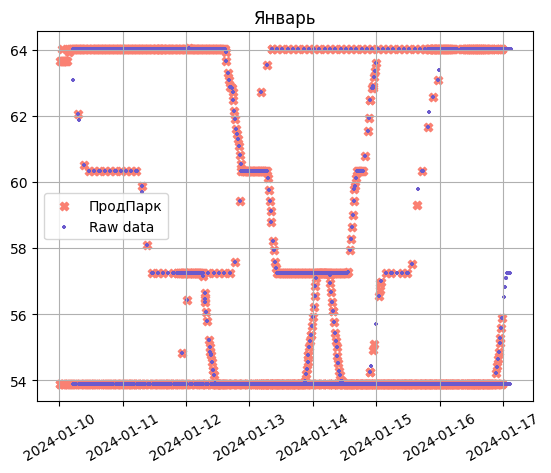

In [42]:
plt.scatter(data2['time2'], data2['longitude'], marker='X', color='salmon', label='ПродПарк')

plt.scatter(data23['packtime']+datetime.timedelta(hours=3), data23['longitude'], marker='+', s=7, color='slateblue', label='Raw data')
plt.legend()
plt.title('Январь')
plt.grid()
plt.xticks(rotation=30)

In [38]:
data_2['last_time'] += 25200

In [39]:
data_2['packtime'] = pd.to_datetime(data_2.last_time, unit='s')
data_2.sort_values(by='last_time')

,id_event,prod_type,prod_number,last_time,all_run,latitude,longitude,control_area,control_area_time,cycle_status,cycle_status_time,max_range,idle_time,speed,direct,t_device,battery,charge,radio_quality,accelrate,av_range,hit_energy,hit_class,last_send_time,stat_interval,model,idle_category,time_off,offline,idle,condition,hit,up_weight,pict_color,id_dev_ut,idle_limit,start_idle_time,stop_idle_time,low_bat,order_id,train_id,cargo_id,pollution_id,esr,dev_fault_f,status_load,template_id,man_n,net_number,getdata,is_lost_package,heat,rw_esr_name,control_area_name,last_idle_event,odometer,packtime
2889,dwtest20-vjrLSWghVCHjNVVWadiqOyyV-40,0a64d1cc-8346-1cfc-8183-5f3a23fb0005,0a64b591-86a2-1578-8186-a26507030003,1677181898,0.000,63.575653,53.703860,100,1654194446,100,1654194446,0.0,0,0.0,0.00,-10.0,100,70,100,0.3,0.0,0.0,NO_HIT,0,123,13-5205,None,1654194446,False,False,False,False,False,pictColor_1,dwtest20,0,0,0,False,None,None,None,None,None,{'wheel': [200]},False,0a64b5a1-869c-197d-8186-a1a6cf530005,00000012,40007890,2023-07-27 20:13:30.220228,1.0,0.0,None,None,False,0,2023-02-23 19:51:38
2890,dwtest20-MVSUguYweMEfDVxsvaQBGgXw-41,0a64d1cc-8346-1cfc-8183-5f3a23fb0005,0a64b591-86a2-1578-8186-a26507030003,1677189098,0.000,63.575558,53.704033,100,1654194446,100,1654194446,0.0,0,0.0,0.00,-11.0,100,70,100,0.3,0.0,0.0,NO_HIT,0,123,13-5205,None,1654194446,False,False,False,False,False,pictColor_1,dwtest20,0,0,0,False,None,None,None,None,None,{'wheel': [200]},False,0a64b5a1-869c-197d-8186-a1a6cf530005,00000012,40007890,2023-07-27 20:13:30.729567,1.0,0.0,None,None,False,0,2023-02-23 21:51:38
2899,dwtest20-JUAjonAjAXhVoxcQebtZtTZl-42,0a64d1cc-8346-1cfc-8183-5f3a23fb0005,0a64b591-86a2-1578-8186-a26507030003,1677196301,0.000,63.575207,53.704280,100,1654194446,100,1654194446,0.0,0,0.0,0.00,-11.0,100,70,100,0.3,0.0,0.0,NO_HIT,0,123,13-5205,None,1654194446,False,False,False,False,False,pictColor_1,dwtest20,0,0,0,False,None,None,None,None,None,{'wheel': [200]},False,0a64b5a1-869c-197d-8186-a1a6cf530005,00000012,40007890,2023-07-28 14:59:13.068130,1.0,0.0,None,None,False,0,2023-02-23 23:51:41
2900,dwtest20-DrZvHGutPzvPhcPOlMirLRZn-43,0a64d1cc-8346-1cfc-8183-5f3a23fb0005,0a64b591-86a2-1578-8186-a26507030003,1677203504,0.000,63.575060,53.704350,100,1654194446,100,1654194446,0.0,0,0.0,0.00,-11.0,100,70,100,0.3,0.0,0.0,NO_HIT,0,123,13-5205,None,1654194446,False,False,False,False,False,pictColor_1,dwtest20,0,0,0,False,None,None,None,None,None,{'wheel': [200]},False,0a64b5a1-869c-197d-8186-a1a6cf530005,00000012,40007890,2023-07-28 14:59:13.437292,1.0,0.0,None,None,False,0,2023-02-24 01:51:44
2901,dwtest20-qVkjvqdmgnzPzZAdAQnrvmWI-44,0a64d1cc-8346-1cfc-8183-5f3a23fb0005,0a64b591-86a2-1578-8186-a26507030003,1677210701,0.000,63.575220,53.703540,100,1654194446,100,1654194446,0.0,0,0.0,0.00,-11.0,100,70,100,0.3,0.0,0.0,NO_HIT,0,123,13-5205,None,1654194446,False,False,False,False,False,pictColor_1,dwtest20,0,0,0,False,None,None,None,None,None,{'wheel': [200]},False,0a64b5a1-869c-197d-8186-a1a6cf530005,00000012,40007890,2023-07-28 14:59:13.962090,1.0,0.0,None,None,False,0,2023-02-24 03:51:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4941,dwtest17-FQEdyHnhdVHiNrxPwJlkIDCN-730,0a64d1cc-8346-1cfc-8183-5f3a23fb0005,0a64b591-86a2-1578-8186-a254f9b40002,1705642322,32388.280,64.902680,56.444855,100,1654194446,100,1654194446,0.0,0,55.0,59.73,-15.0,100,70,100,0.2,0.0,0.0,NO_HIT,0,123,13-5205,None,1654194446,False,False,False,False,False,pictColor_1,dwtest17,0,0,0,False,None,None,None,None,None,{'wheels': []},False,0a64b5a1-869c-197d-8186-a1a6cf530005,00000009,40009599,2024-01-18 22:32:24.697591,1.0,0.0,None,test,False,197913,2024-01-19 05:32:02
4944,dwtest17-QFxTtEMopEXxVZTlPyEoboSc-731,0a64d1cc-8346-1cfc-8183-5f3a23fb0005,0a64b591-86a2-1578-8186-a254f9b40002,1705642407,32388.280,64.9

In [34]:
data_1.packtime

0      2023-08-17 07:51:08
1      2023-08-17 09:51:00
2      2023-08-17 11:51:03
3      2023-08-17 13:51:00
4      2023-08-17 15:50:59
               ...        
2638   2023-03-07 03:07:42
2639   2023-03-07 01:07:30
2640   2023-03-06 23:07:21
2642   2023-03-06 21:07:16
2643   2023-03-06 19:07:10
Name: packtime, Length: 51035, dtype: datetime64[ns]

In [33]:
data_1 = data_1[(data_1.packtime >= '2023-03-06 15:14:35') & (data_1.packtime <= '2024-01-18 21:31:11')]
data_1.sort_values(by='packtime').reset_index(drop=True)

,record_id,device_id,pack_id,rwcarfw,mestypeid,packtime,latitude,longitude,velocity,direction,temperature,rssi,batmain,area_id,g_range,g_freq,g_time,accel_forward,accel_vertical,accel_transverse,getdata,odometer
0,994.0,dwtest17,557.0,41616.0,0.0,2023-03-06 15:19:12,63.600193,53.900873,0.3,0.00,-16.0,68.0,9570.0,NaN,16.0,200.0,3.0,"[-1008.0, -1008.0, -1008.0, -1008.0, -1008.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-48.0, -48.0, -48.0, -48.0, -48.0, -48.0, -48...",2023-03-08 01:20:42.544,0.0
1,278.0,dwtest16,185.0,41616.0,0.0,2023-03-06 15:23:31,65.915526,58.092148,57.3,231.52,-23.0,94.0,8756.0,NaN,16.0,200.0,3.0,"[-1488.0, -1968.0, -1392.0, -864.0, -960.0, -1...","[624.0, 1536.0, 912.0, 816.0, 528.0, 0.0, -48....","[480.0, 48.0, -528.0, -144.0, 288.0, 96.0, 192...",2023-03-06 21:11:43.836,0.0
2,228.0,dwtest27,276.0,41616.0,0.0,2023-03-06 16:47:21,65.425659,58.198964,12.7,252.61,-24.0,0.0,9273.0,NaN,16.0,200.0,3.0,"[-1104.0, -1152.0, -1104.0, -1008.0, -1008.0, ...","[-192.0, -240.0, 96.0, -48.0, 48.0, -192.0, -4...","[-240.0, -288.0, 240.0, 336.0, -240.0, 0.0, 14...",2023-03-06 20:48:16.448,0.0
3,60323.0,dwtest20,189.0,41616.0,0.0,2023-03-06 16:59:40,63.600176,53.900138,0.3,0.00,-19.0,56.0,9526.0,NaN,16.0,200.0,3.0,"[-960.0, -912.0, -912.0, -912.0, -912.0, -912....","[-96.0, -96.0, -48.0, -48.0, -96.0, -96.0, -96...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2023-07-26 12:34:23.803,0.0
4,1093.0,dwtest23,1099.0,41616.0,0.0,2023-03-06 17:15:42,63.600151,53.900486,0.0,234.73,-18.0,68.0,9493.0,NaN,16.0,200.0,3.0,"[-1056.0, -1056.0, -1056.0, -1056.0, -1008.0, ...","[48.0, 48.0, 48.0, 48.0, 0.0, 0.0, 0.0, 0.0, 0...","[-48.0, -48.0, -96.0, -48.0, -48.0, -96.0, -96...",2023-03-08 07:16:47.490,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51030,195248.0,dwtest17,683.0,41713.0,0.0,2024-01-18 21:23:08,64.498101,55.352145,60.7,47.49,-16.0,90.0,8965.0,NaN,16.0,200.0,3.0,"[-768.0, -1248.0, -1104.0, -960.0, -1296.0, -1...","[0.0, -96.0, -240.0, 144.0, -240.0, 240.0, -43...","[-48.0, 0.0, -240.0, -192.0, -48.0, -96.0, 96....",2024-01-18 21:23:30.657,127808.0
51031,195249.0,dwtest17,684.0,41713.0,0.0,2024-01-18 21:24:24,64.506110,55.371824,59.7,46.17,-16.0,86.0,9009.0,NaN,16.0,200.0,3.0,"[-1056.0, -1008.0, -1104.0, -1200.0, -1104.0, ...","[-96.0, 48.0, -192.0, -96.0, -192.0, 0.0, -240...","[-96.0, -48.0, 48.0, -144.0, 0.0, 48.0, -96.0,...",2024-01-18 21:24:44.438,129833.0
51032,195252.0,dwtest17,685.0,41713.0,0.0,2024-01-18 21:25:39,64.514301,55.392124,66.3,46.48,-16.0,90.0,9009.0,NaN,16.0,200.0,3.0,"[-960.0, -1056.0, -1200.0, -1104.0, -1296.0, -...","[-144.0, 48.0, -48.0, 144.0, 336.0, 288.0, 672...","[0.0, 288.0, 96.0, -192.0, -48.0, -96.0, -336....",2024-01-18 21:25:59.329,130882.0
51033,195254.0,dwtest17,687.0,41713.0,0.0,2024-01-18 21:29:17,64.540021,55.455450,73.7,46.61,-16.0,80.0,8987.0,NaN,16.0,200.0,3.0,"[-1104.0, -1536.0, -1248.0, -912.0, -960.0, -1...","[384.0, 192.0, 288.0, 288.0, 192.0, 432.0, 0.0...","[240.0, -48.0, 0.0, -96.0, 0.0, -288.0, -192.0...",2024-01-18 21:29:23.031,135267.0


In [ ]:


for dw in data_1.device_id.unique():
    
    raw_box = data_1[data_1.device_id = dw].sort_values(by='packtime').reset_index(drop=True)
    box = data_2[data_2.id_dev_ut = dw].sort_values(by='last_time').reset_index(drop=True)
    
    